In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
loans = pd.read_csv("loan_data.csv")
loans.head()


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [56]:
loans.info()
loans.columns
loans.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


<AxesSubplot:>

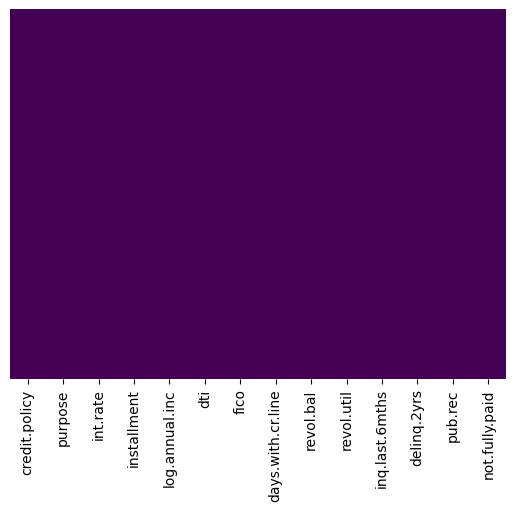

In [57]:
#just need to check if the data is cleaned
sns.heatmap(loans.isnull(),yticklabels = False,cbar =False, cmap = 'viridis')


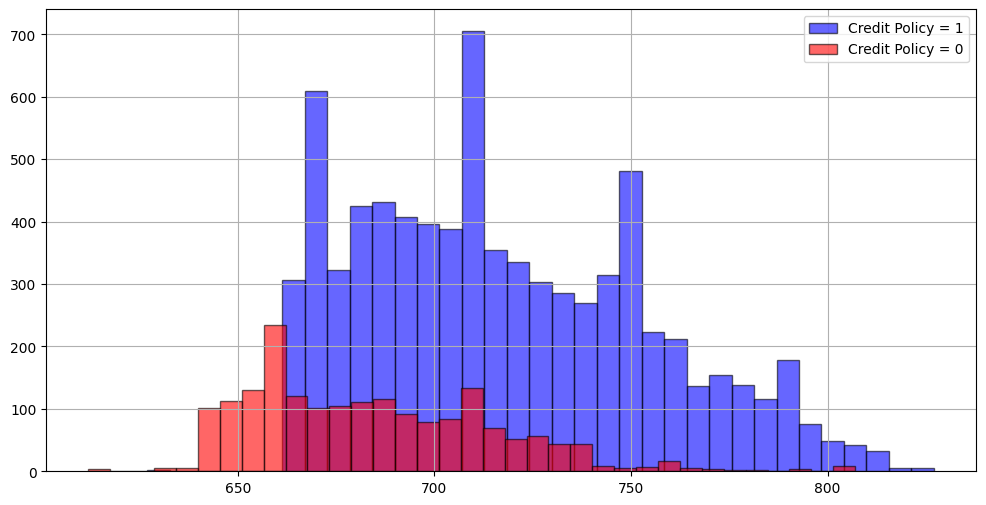

In [58]:
#Fair Isaac Corporation that help calculate credit scores based on info.
#sns.histplot(loans["fico"],hue = "credit.policy") #we will be increasing the bins to 35 to get more data out
#adding in alpha for some clarity
plt.figure(figsize = (12,6))
loans[loans["credit.policy"]==1]["fico"].hist(bins = 35, color = 'blue',label = "Credit Policy = 1", alpha = 0.6,edgecolor = "black")
loans[loans["credit.policy"]==0]["fico"].hist(bins =35,color = 'red',label = "Credit Policy = 0",alpha = 0.6,edgecolor = "black")
plt.legend()


#from our histogram conditional visualisation we can see that there is alot bigger proportion of people who returns back their loans compared to the ones who do not
#people with credit score of around 660 (cut-off) would have a credit score of 0, of not paying back

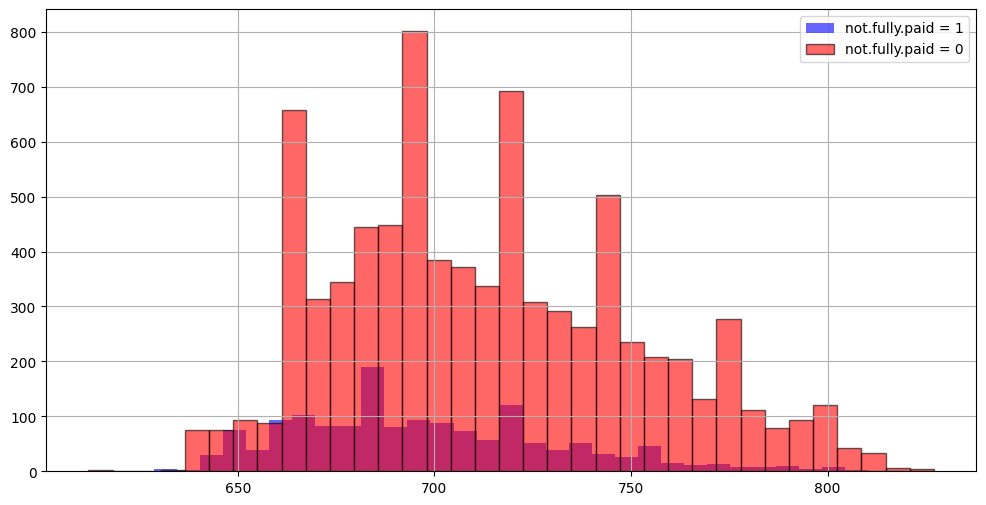

In [59]:
plt.figure(figsize = (12,6))
loans[loans["not.fully.paid"]==1]["fico"].hist(bins = 35, color = 'blue',label = "not.fully.paid = 1", alpha = 0.6)
loans[loans["not.fully.paid"]==0]["fico"].hist(bins =35,color = 'red',label = "not.fully.paid = 0",alpha = 0.6,edgecolor = "black")
plt.legend()
#it just shows how it is true that there is a significantly smaller proportion of people not able  to pay fully
#mainly we can see that there is a larger proportion of people with credit score of 680 not paying fully (how we know fico has sudden spike due to the 
#nature of its data) even as they overlap


[Text(0, 0, 'debt_consolidation'),
 Text(1, 0, 'credit_card'),
 Text(2, 0, 'all_other'),
 Text(3, 0, 'home_improvement'),
 Text(4, 0, 'small_business'),
 Text(5, 0, 'major_purchase'),
 Text(6, 0, 'educational')]

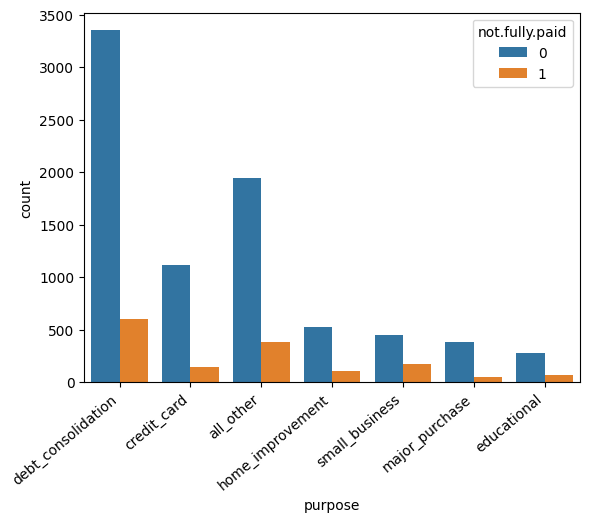

In [60]:
#we try using countplot as rmbed to visualise the relationship between features and label
#xticklabels with rotations of 40
ax = sns.countplot(x = "purpose", hue = "not.fully.paid",data = loans)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#we can see that mainly people loan for debt consolidation which in proportion has people paying fully the most
#if we talk about different proportion, I would say small_business has the biggest percentage in their proportion that does not pay fully


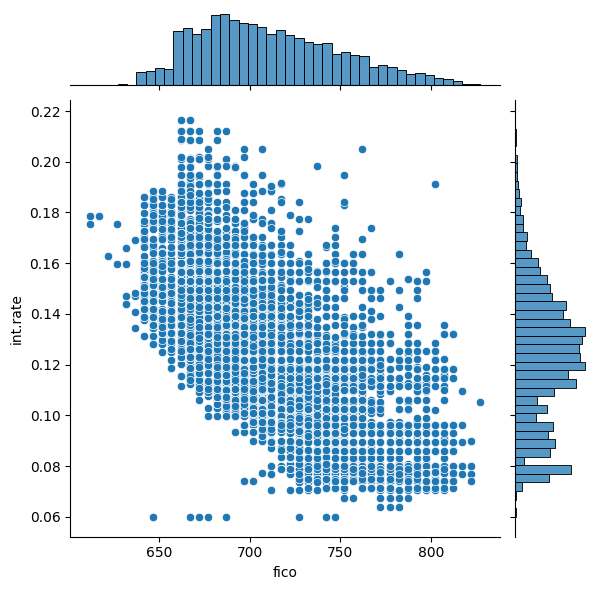

In [61]:
sns.jointplot(x = "fico", y = "int.rate",data = loans)
#we can see how they are similiar normal distributions and how as the fico score increases, somewhat our int rate decreases
#as the fico score goes down,the interest rate would becoem higher 

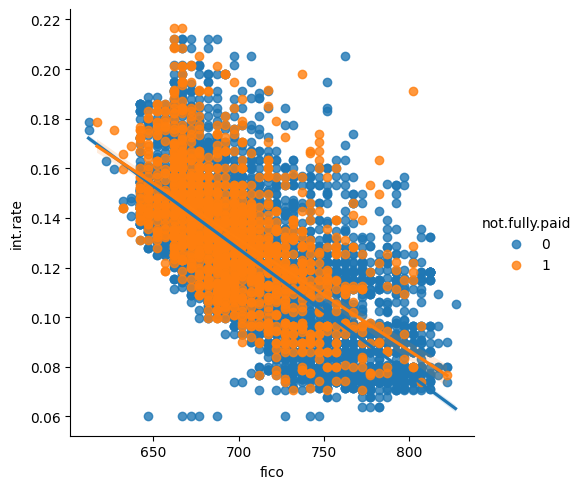

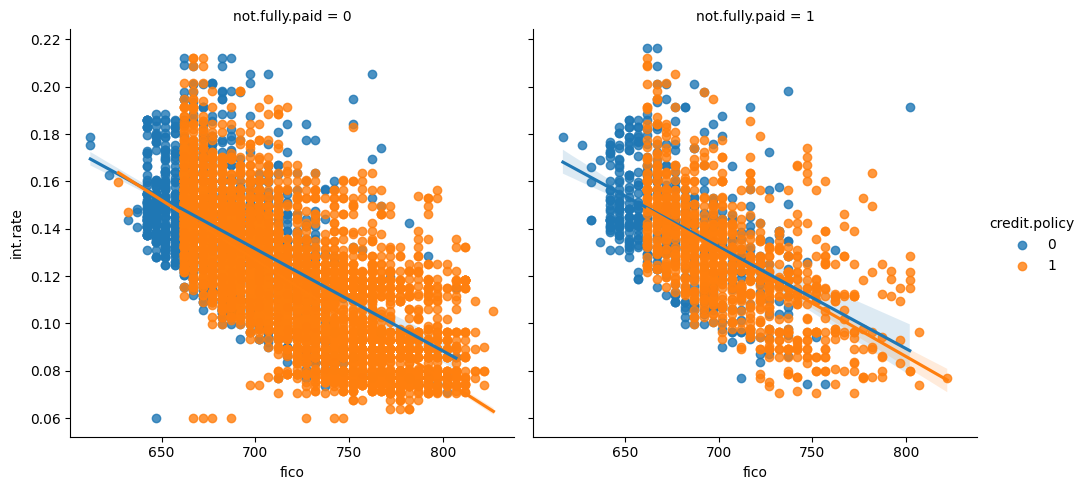

In [67]:
#it is essenially the plot below just with the scatterplot on top of the linear line
#we want to see how the fico and interest rate would be affected as a whole with not.fully.paid
#we created two 'columns' to separate the graphs, we can see how the behaviour is about the same,
#ANOTHER WAY OF STUYDING THE BEHAVIOUR USING LMPLOT
#WHETHER or not it was fully paid 
sns.lmplot(x = "fico", y="int.rate", data = loans,hue = "not.fully.paid")
sns.lmplot(x = "fico", y="int.rate", data = loans,hue = "credit.policy",col = "not.fully.paid")

In [68]:
#now we would need to use.get dummies to convert the cat to 0 and 1
cat_feats = ["purpose"]

In [75]:
#drop first to avoid any multi collinear issues
final_data = pd.get_dummies(loans,columns = cat_feats,drop_first = True)


In [76]:
final_data.head() #see how it segregrates

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [82]:
#now we can start to train our model
from sklearn.model_selection import train_test_split
X = final_data.drop("not.fully.paid",axis = 1)
y = final_data["not.fully.paid"]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 101)

In [84]:
#create a decision tree model first
from sklearn.tree import DecisionTreeClassifier

In [115]:
from sklearn.ensemble import RandomForestClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [116]:
predictions = dtree.predict(X_test)

In [121]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print("\n")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.19      0.24      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



[[1985  446]
 [ 336  107]]


In [122]:
from sklearn.ensemble import RandomForestClassifier

In [125]:
rfc = RandomForestClassifier(n_estimators= 300)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

In [127]:
print(classification_report(y_test,rfc_pred))
print("\n")
print(confusion_matrix(y_test,rfc_pred))
#we can see an improvement in performance of model but the recall for class 1 is 0.02 for random forest
#for decision tree class 1 recall is 0.24

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.69      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.77      0.51      0.48      2874
weighted avg       0.82      0.85      0.78      2874



[[2426    5]
 [ 432   11]]


In [ ]:
#OVERALL the random forest did overall better performance although the recall for type 1 errors and f1-score are better for decision tree model
#depends on the business domain